In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# plots for the averaged for each timestamp 

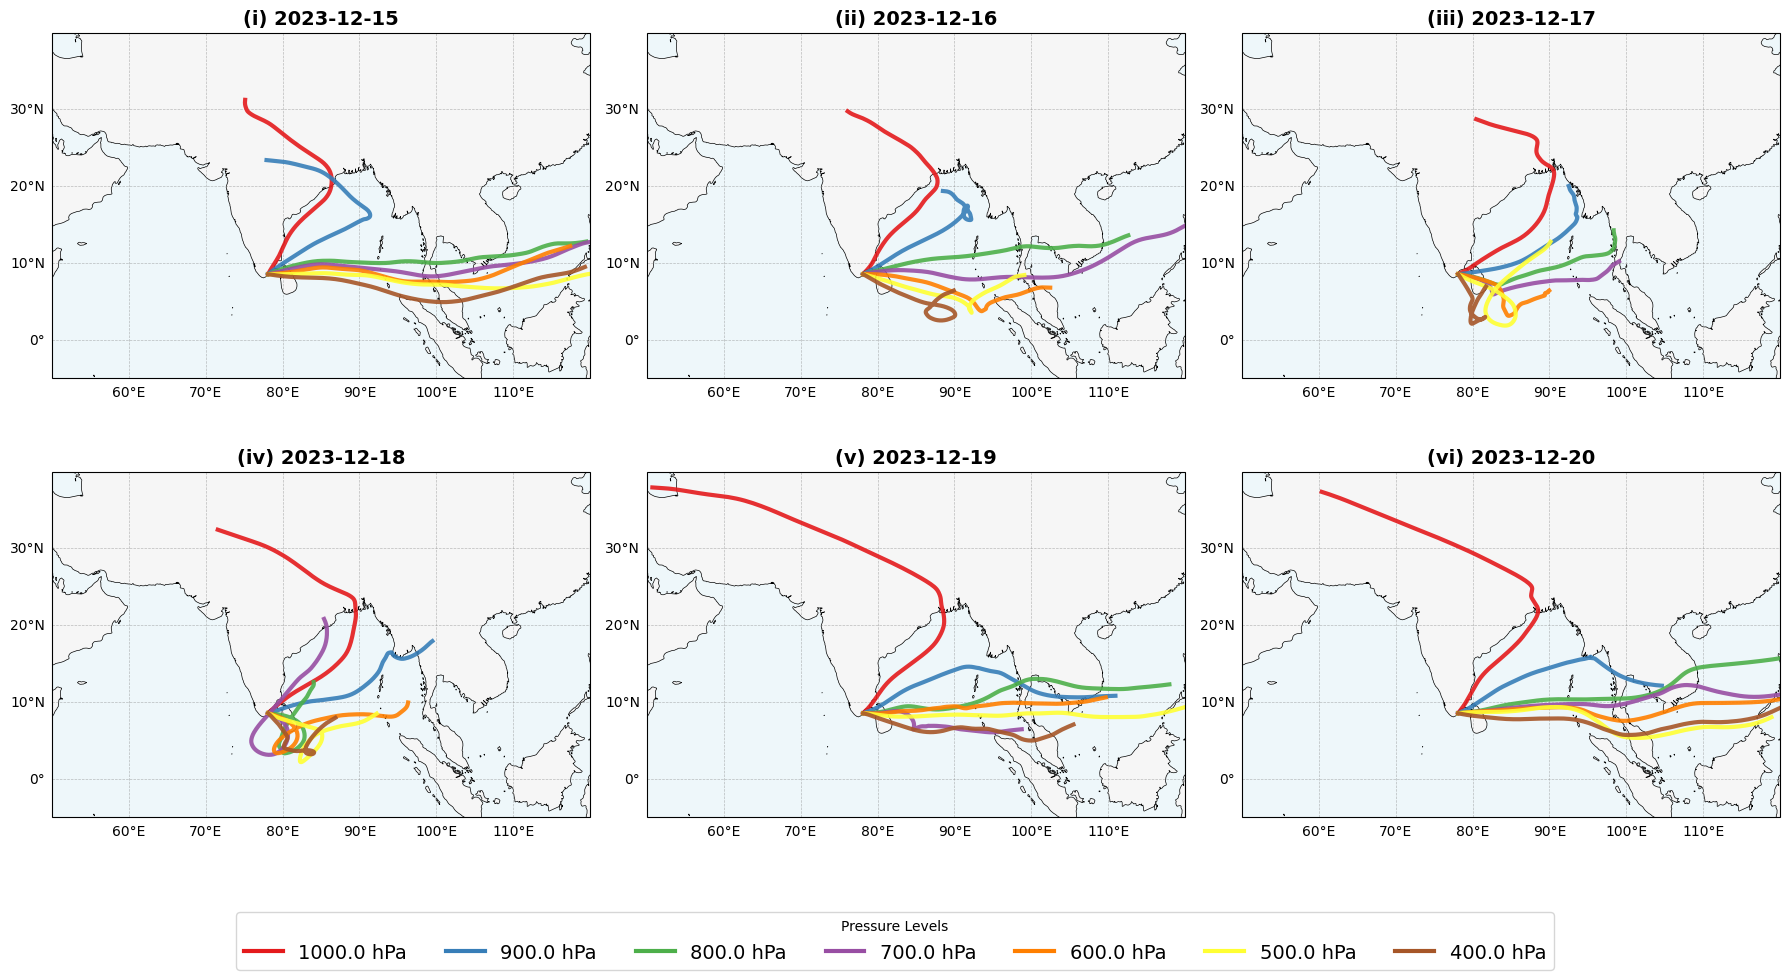

In [ ]:

def plot_trajectories_with_pressure_averaged(csv_file_path, date, ax, subplot_label):
    # Read the CSV file
    df = pd.read_csv(csv_file_path, index_col=0)

    # Convert height to pressure level
    df['pressure_level'] = df['height_m'].apply(
        lambda h: round(1013.25 * (1 - h / (145366.45 * 0.3048)) ** (1 / 0.190284), 0)
    )

    # Convert datetime columns
    df['traj_dt_i'] = pd.to_datetime(df['traj_dt_i'], format='mixed')
    df['traj_dt'] = pd.to_datetime(df['traj_dt'], format='mixed')

    # Group by hour and pressure level
    grouped_df = df.groupby(['hour_along', 'pressure_level']).agg(
        {'lat': 'mean',
         'lon': 'mean',
         'traj_dt': 'first',
         'lat_i': 'first',
         'lon_i': 'first',
         }).reset_index()

    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.2)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.2)

    # Set plot extent
    ax.set_extent([50, 120, -5, 40], crs=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Define pressure levels and colors
    level = [1000.0, 900.0, 800.0, 700.0, 600.0, 500.0, 400.0]
    colors = sns.color_palette("Set1", len(level))

    # Plot each pressure level
    for i, pressure_level in enumerate(level):
        subset = grouped_df[grouped_df['pressure_level'] == pressure_level]
        ax.plot(subset['lon'], subset['lat'], color=colors[i], transform=ccrs.PlateCarree(), alpha=0.9, linewidth=3)

    # Add subplot label and date title
    ax.set_title(f'{subplot_label} {date}', fontsize=14, fontweight='bold')


# ------------------------- MAIN SCRIPT -------------------------

# Set up the date range for subplots
dates = pd.date_range('2023-12-15', '2023-12-20', freq='D')

# Labels for subplot titles
subplot_labels = ['(i)', '(ii)', '(iii)', '(iv)', '(v)', '(vi)']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 9), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# Loop through dates and plot each trajectory
for i, date in enumerate(dates):
    csv_file_path = f"C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/hysplit/Kayalpattinam_{date.strftime('%Y-%m-%d')}.csv"
    label = subplot_labels[i] if i < len(subplot_labels) else ''
    plot_trajectories_with_pressure_averaged(csv_file_path, date.strftime('%Y-%m-%d'), axs[i], label)

# Create legend for pressure levels
level = [1000.0, 900.0, 800.0, 700.0, 600.0, 500.0, 400.0]
colors = sns.color_palette("Set1", len(level))
handles = [plt.Line2D([0], [0], color=color, lw=3) for color in colors]
legend_labels = [f"{pressure} hPa" for pressure in level]

# Place the legend outside the plots
fig.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=7, title='Pressure Levels', fontsize=14)
plt.tight_layout()

# Save the figure
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/Moisture_Trajectory.png", dpi=300, bbox_inches='tight')
plt.show()
